In [1]:
#PROBLEM STATEMENT-- TO PREDICT CHURNING OUT CUSTOMERS

#WE ARE GOING TO IMPLEMENT THE CLASSIFICATION ALGO TO CUSTMOR CHURN DATA

In [2]:
#LOAD THE DATA

In [3]:
import pandas as pd
import numpy as np


In [4]:
churn_data=pd.read_csv("/content/customer_churn-2.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churn_data["TotalCharges"]=pd.to_numeric(churn_data["TotalCharges"],errors="coerce")

In [8]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#missing values

In [10]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
churn_data.shape

(7043, 21)

In [12]:
churn_data.dropna(inplace=True)

In [13]:
churn_data.shape

(7032, 21)

In [14]:
#as customerid woulds not help in prediction and also its not appropruiate in model will drop

In [15]:
churn_data.drop(columns=["customerID"],inplace= True)

In [16]:
churn_data.shape

(7032, 20)

In [17]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
churn_data.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
#label encoding

In [21]:
#to convert into numerical categories ..because the string data would hamper our model.
#to perform label_encoder(), to use map(function)

In [22]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
churn_data['gender'] = churn_data['gender'].map({'Female': 1, 'Male': 0})
churn_data['PhoneService'] = churn_data['PhoneService'].map({'Yes': 1, 'No': 0})



In [24]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,0,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,0,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,0,84.80,1990.50,No
7039,1,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,No
7040,1,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,1,29.60,346.45,No
7041,0,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,0,74.40,306.60,Yes


In [25]:
churn_data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
#data visualization

<Axes: >

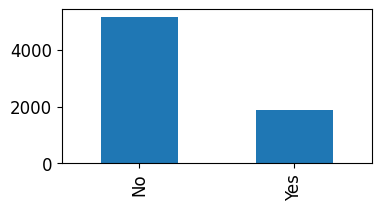

In [27]:
churn_data["Churn"].value_counts().plot(kind="bar",figsize=(4,2),fontsize=12)

<ipython-input-28-8c0d37e63a83>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(), annot=True)


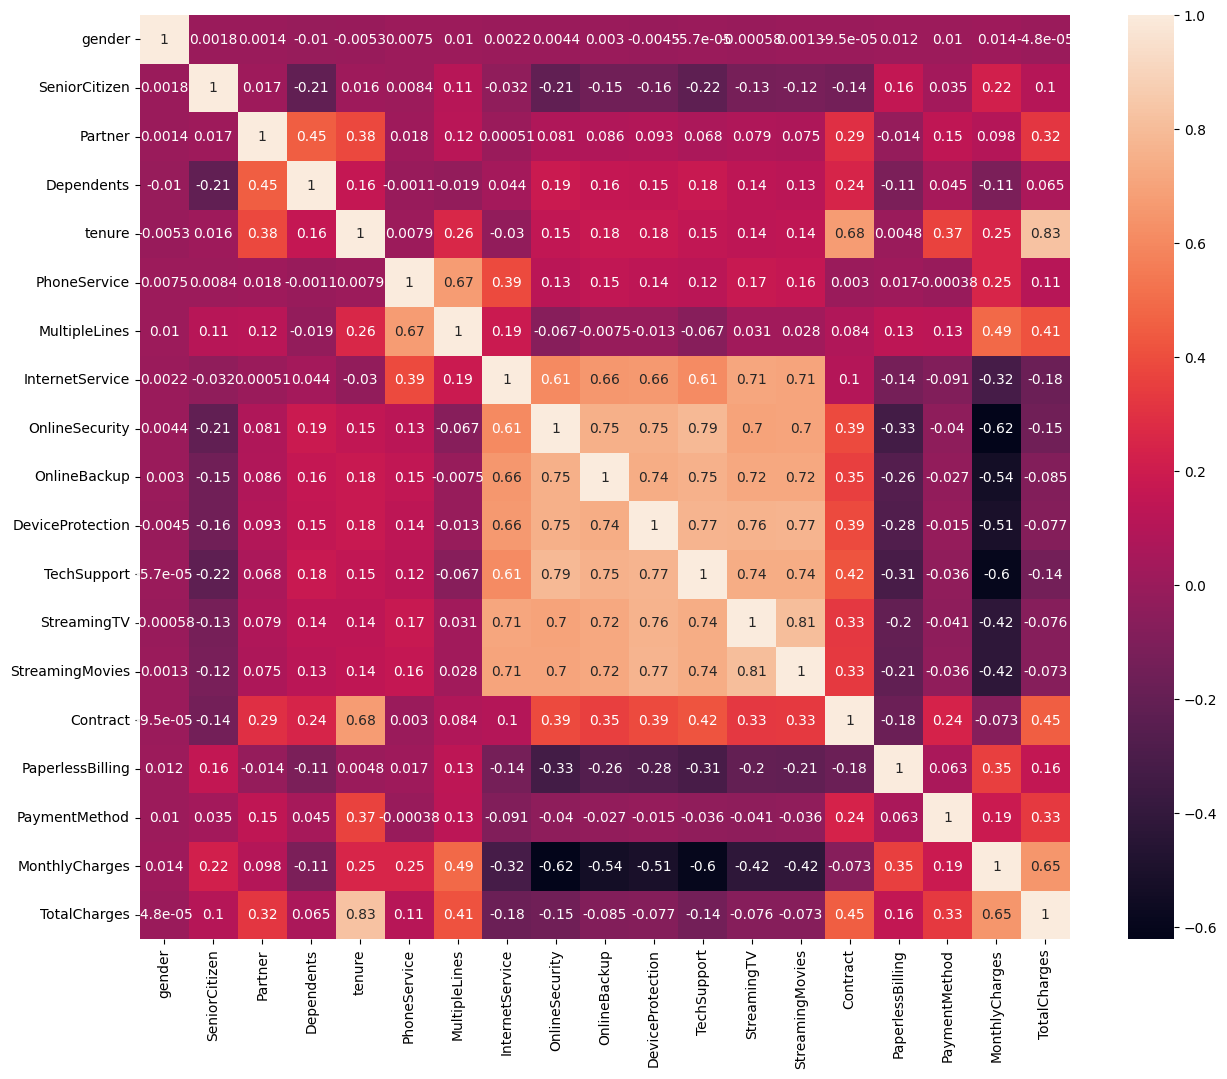

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(churn_data.corr(), annot=True)
plt.show()

In [29]:
#MODEL BUILDING

In [30]:
churn_data['Churn']=churn_data["Churn"].map({"Yes":1,"No":0})



In [31]:
X=churn_data.iloc[:,:-1].values
Y=churn_data.iloc[:,-1].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [35]:
rf1=rf.fit(x_train,y_train)

In [36]:
y_pred=rf1.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(rf1.predict(x_train),y_train)

0.9978666666666667

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7903340440653873

hyperparametric tuning

In [40]:
#there are many parameters tht define the model structure ,and tuning meansfinding the best model structure.
#THERE ARE MANY PARAMETER WHICH WE CAN LOOK ...

#THEREB ARE TWO TECHNIQUE --- 1- RANDOMSEARCHCV  2--- GRIDSEARCHSEARCHCV




In [43]:
import numpy as np

In [46]:
from sklearn.model_selection import RandomizedSearchCV
#no of trees in random forest
n_estimators= [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#no of feature to consider at every split
max_features= ["auto","sqrt"]
#max no of level in tree
max_depth= [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#min no of samples tht required to split a node
min_samples_split= [2,5,10]
#min no of samples tht req at each leaf nofde
min_samples_leaf= [1,2,4]
 #method of selecting samples for training each tree
bootstrap=[True,False]
#creating random grip
random_grid = {"n_estimators":n_estimators,
               "max_features":max_features,
               "max_depth": max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf,
               "bootstrap":bootstrap }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
#step to implement
#1-use the randpom grid for hyperparament
#2- i created the base model to tune
#3-random search for paramenter
#4- fiting the random search


In [47]:
rf= RandomForestClassifier(random_state=42)
rf_random= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,scoring="neg_mean_absolute_error",cv=3,verbose=2,random_state=42,n_jobs=-1,return_train_score=True)

In [ ]:
rf2=rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf2.best_params_

In [ ]:
y_pred=rf2.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(x_train,y_train)